#### Functions

In [1]:
import torch
import sys
sys.path.insert(1,'../data_utils/')
from OrigamiTransform import OrigamiTransform

In [2]:
def generate_config(nbeads,nsamples=1,bond_length=1): 

    coords = torch.empty(nsamples,nbeads,3)
    coords[:,0,:] = 0 # Bead 0 at origin 
    for i in range(1,nbeads): 
        step = torch.randn(nsamples,3)
        step/= (step.square().sum(-1,keepdim=True).sqrt() * bond_length).expand(-1,3) 
        coords[:,i,:] = coords[:,i-1,:] + step

    return coords

In [3]:
origami_transform = OrigamiTransform()

#### Generate random walk sample & make the plots 

In [4]:
nbeads = 64
nsamples=1
#coords = generate_config(nbeads,1)
coords = torch.load('figure_coords.pt') 
dists = torch.cdist(coords,coords)
dists = dists.unsqueeze(0) if nsamples==1 else dists
submap = origami_transform(dists)
print(f'dists shape: {dists.shape}')
print(f'submap shape: {submap.shape}') 


dists shape: torch.Size([1, 1, 64, 64])
submap shape: torch.Size([1, 2, 32, 32])


In [6]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
n = 0 # map selection. Unimportant unless more than one configuration was generated
vmin=0
vmax=dists.max()
main_cmap = 'RdBu'#'viridis'
null_cmap = 'bone'
tert_cmap = 'hot'

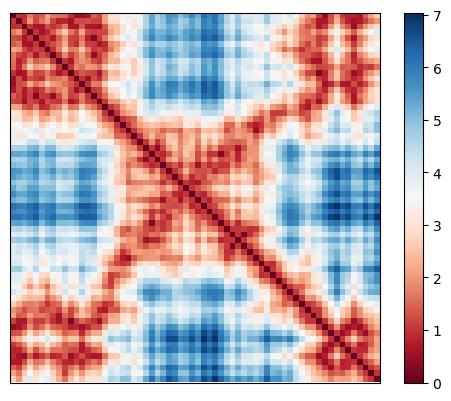

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
#fig.colorbar(im)
ax.set_xticks([])
ax.set_yticks([]);

fig.save_fig

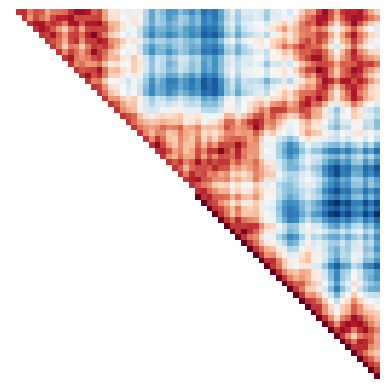

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,0,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[j,i] = torch.nan
ii = torch.arange(temp.shape[-1]//2)
temp[ii,ii] = torch.nan

#im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([]);

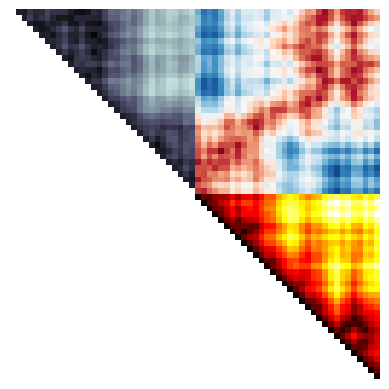

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,0,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[j,i] = torch.nan
ii = torch.arange(temp.shape[-1]//2)
temp[ii,ii] = torch.nan
nn = temp.shape[-1]//2

#im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
temp[:nn,nn:] = torch.nan
im = ax.matshow(temp,cmap=null_cmap,vmin=vmin,vmax=vmax)
temp[:nn,:nn] = torch.nan
im = ax.matshow(temp,cmap=tert_cmap,vmin=vmin,vmax=vmax)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([]);

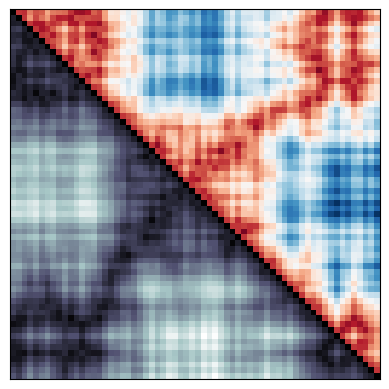

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,0,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[i,j] = torch.nan

im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=null_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

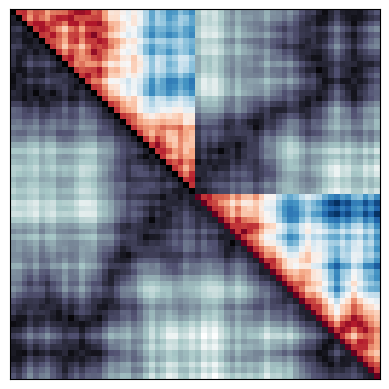

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = dists[n,0,:,:].clone()
i,j = torch.triu_indices(temp.shape[-1],temp.shape[-1],1)
temp[j,i] = torch.nan
nn = temp.shape[-1]//2
temp[:nn,-nn:] = torch.nan
ii = torch.arange(nn)
temp[ii,ii] = torch.nan # Only the second half of the diagonal is preserved

im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

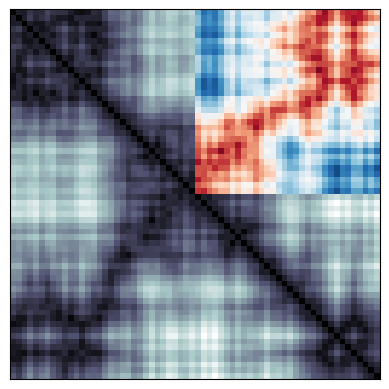

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = torch.empty_like(dists[n,0,:,:]).fill_(torch.nan)
temp[:nn,-nn:] = dists[n,0,:nn,-nn:]

im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

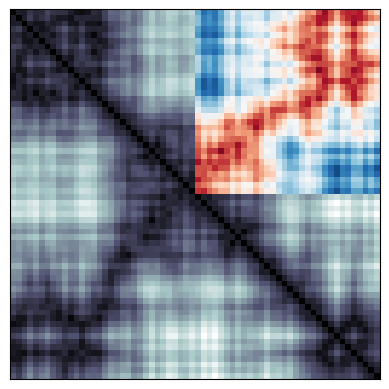

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

temp = torch.empty_like(dists[n,0,:,:]).fill_(torch.nan)
temp[:nn,-nn:] = dists[n,0,:nn,-nn:]

im = ax.matshow(dists[n,0,:,:].cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp,cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

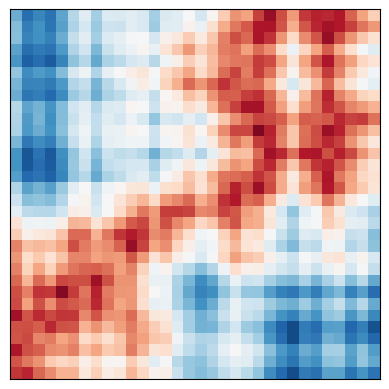

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(submap[n,0,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

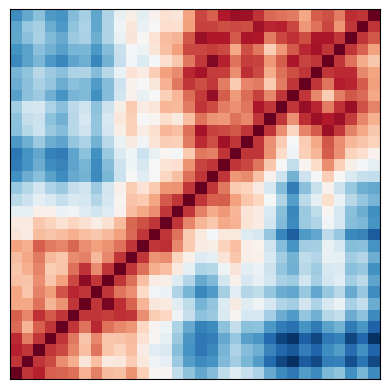

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

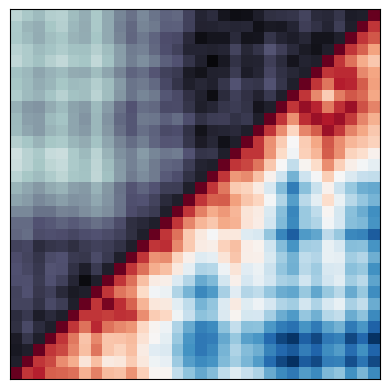

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],0)
temp = submap[n,1,:,:].clone().flipud()
temp[i2,j2] = torch.nan
temp = temp.flipud()

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

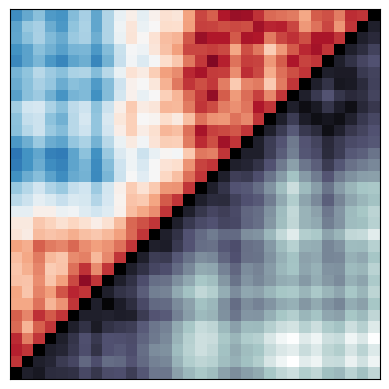

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],1)
temp = submap[n,1,:,:].clone().fliplr()
temp[i2,j2] = torch.nan
temp = temp.fliplr()

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=main_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);

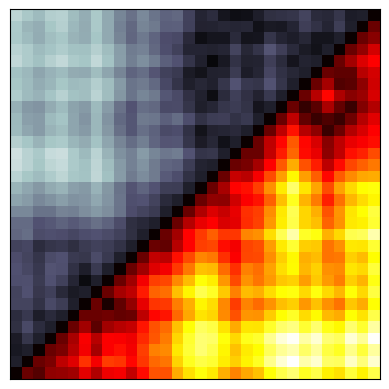

In [19]:
submap = origami_transform(dists)
fig = plt.figure()
ax = fig.add_subplot(111)

i2,j2 = torch.triu_indices(submap.shape[-1],submap.shape[-1],0)
temp = submap[n,1,:,:].clone().flipud()
temp[i2,j2] = torch.nan
temp = temp.flipud()

im = ax.matshow(submap[n,1,:,:].cpu().numpy(),cmap=tert_cmap,vmin=vmin,vmax=vmax)
im = ax.matshow(temp.cpu().numpy(),cmap=null_cmap,vmin=vmin,vmax=vmax)
ax.set_xticks([])
ax.set_yticks([]);